# Distribution of number of affected TSS for both molecular phenotypes

In [1]:
library("stringr")
library("dplyr")
library("readr")
library("ggplot2")
library("purrr")
library("tidyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
options(repr.plot.width =30, repr.plot.height = 20)

In [3]:
color = c("black", "dodgerblue2", "green4", "#6A3D9A",
      "#FF7F00", "gold1", "skyblue2", "#FB9A99", "palegreen2",
      "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
      "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
      "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
      "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
      "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")

## Read data

In [4]:
h16 = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/haQTL_pure_completed_unlimited_16_99pCS.tsv")
m16 = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/mQTL_pure_completed_unlimited_16_99pCS.tsv")

haQTL_affected_region = readr::read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping//all.haQTL.affected_region.tsv","\t")
mQTL_affected_region = readr::read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping//all.mQTL.affected_region.tsv","\t")
gene_name = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/../reference_data/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list")

Rows: 21527 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecular_trait_id
dbl (11): snps_index, chromosome, position, cs_order, pip, finemapped_region...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 53860 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecular_trait_id
dbl (11): snps_index, chromosome, position, cs_order, pip, finemapped_region...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 14720 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): analysis, chr, molecular_trait_id
dbl (3): CS, Start, End
lgl

In [5]:
haQTL_affected_region_gene = inner_join(haQTL_affected_region, gene_name, c("chr" = "#chr"))%>%filter(start < End, start > Start)

Warning message in inner_join(haQTL_affected_region, gene_name, c(chr = "#chr")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [6]:
mQTL_affected_region_gene = inner_join(mQTL_affected_region, gene_name, c("chr" = "#chr"))%>%filter(start < End, start > Start)

Warning message in inner_join(mQTL_affected_region, gene_name, c(chr = "#chr")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


## Filter for only tad that are > 16 phenotypes

In [7]:
haQTL_affected_region_gene = inner_join(haQTL_affected_region_gene , h16%>%group_by(molecular_trait_id,cs_order)%>%summarize(position = mean(position)),c("CS" = "cs_order", "molecular_trait_id" ))

`summarise()` has grouped output by 'molecular_trait_id'. You can override
using the `.groups` argument.


In [8]:
mQTL_affected_region_gene = inner_join(mQTL_affected_region_gene , m16%>%group_by(molecular_trait_id,cs_order)%>%summarize(position = mean(position)),c("CS" = "cs_order", "molecular_trait_id" ))

`summarise()` has grouped output by 'molecular_trait_id'. You can override
using the `.groups` argument.


In [9]:
haQTL_affected_region_gene

CS,Start,End,analysis,chr,molecular_trait_id,purity,start,end,gene_id,gene_name,position
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,2141402,2165187.8,rosmap_haqtl,chr1,tad1,NA,2145278,2145279,ENSG00000271806,AL590822.2,1715745
1,3373659,3375569.6,rosmap_haqtl,chr1,tad1,NA,3373927,3373928,ENSG00000286518,AL354743.1,1715745
1,3594738,3649557.9,rosmap_haqtl,chr1,tad1,NA,3611507,3611508,ENSG00000162591,MEGF6,1715745
1,3594738,3649557.9,rosmap_haqtl,chr1,tad1,NA,3624742,3624743,ENSG00000238260,AL513320.1,1715745
1,3594738,3649557.9,rosmap_haqtl,chr1,tad1,NA,3625014,3625015,ENSG00000158109,TPRG1L,1715745
1,3454010,3491796.8,rosmap_haqtl,chr1,tad1,NA,3454664,3454665,ENSG00000130762,ARHGEF16,1715745
1,3454010,3491796.8,rosmap_haqtl,chr1,tad1,NA,3487245,3487246,ENSG00000272088,AL512413.1,1715745
2,817272,839807.1,rosmap_haqtl,chr1,tad1,NA,817370,817371,ENSG00000177757,FAM87B,1097602
2,817272,839807.1,rosmap_haqtl,chr1,tad1,NA,817711,817712,ENSG00000230092,AL669831.4,1097602


In [10]:
plot_df = rbind(mQTL_affected_region_gene%>%mutate(type = "mQTL"),haQTL_affected_region_gene%>%mutate(type = "haQTL")  )

## Fig: Distribution of number of TSS for each CS

In [11]:
plot_df%>%count(type,molecular_trait_id ,CS)%>%mutate(n1 = ifelse(n <=50, as.factor(n), 60 ))%>%arrange(-n1)

type,molecular_trait_id,CS,n,n1
<chr>,<chr>,<dbl>,<int>,<dbl>
haQTL,tad1,2,51,60
haQTL,tad1127,2,162,60
haQTL,tad1127,4,71,60
haQTL,tad1127,6,76,60
haQTL,tad1127,9,94,60
haQTL,tad1177,3,172,60
haQTL,tad1212,5,67,60
haQTL,tad1217,5,53,60
haQTL,tad1225,5,71,60


In [12]:
scale_y_log10

function (...) 
{
    scale_y_continuous(..., trans = log10_trans())
}
<bytecode: 0x55c85d912f98>
<environment: namespace:ggplot2>

In [13]:
plot_df%>%count(type,molecular_trait_id ,CS)%>%mutate(n1 = ifelse(n <=50, n, 52 ))%>%write_delim("5_dist_distr.tsv","\t")

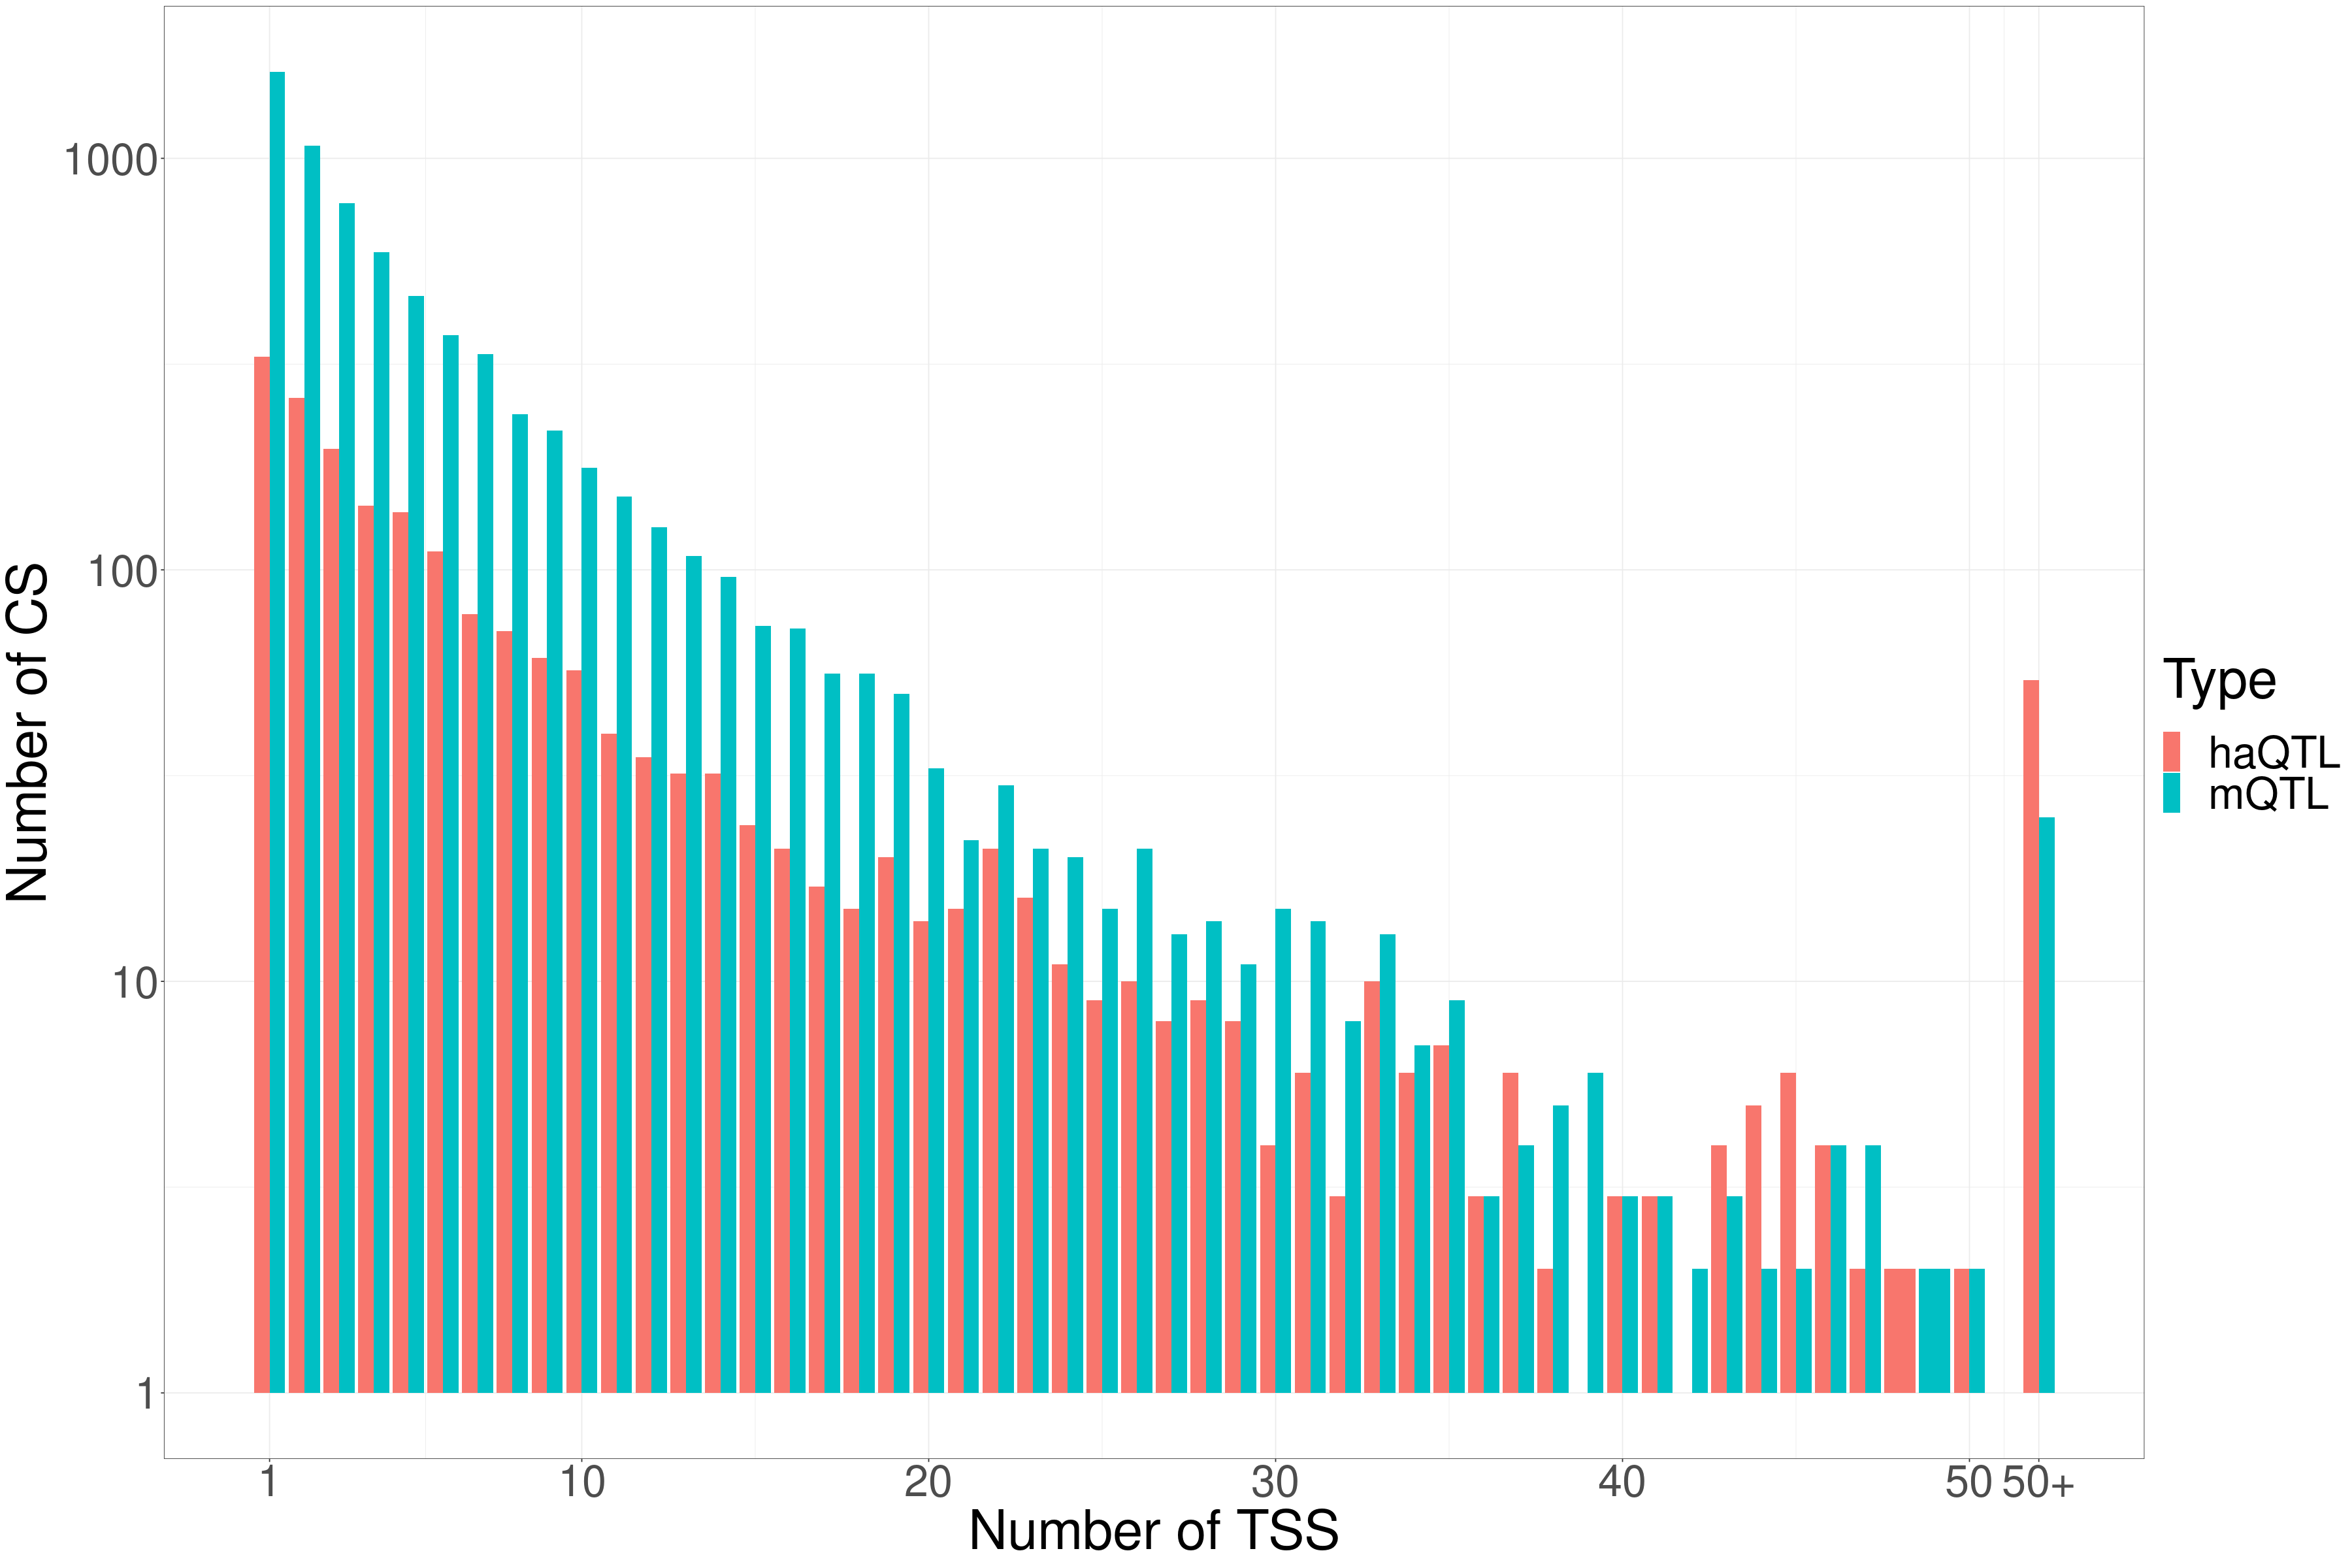

In [14]:
plot_df%>%count(type,molecular_trait_id ,CS)%>%mutate(n1 = ifelse(n <=50, n, 52 ))%>%ggplot()+geom_bar(aes(x =n1,fill = type ), position = "dodge")+xlab("Number of TSS")+scale_y_log10()+scale_x_continuous(breaks = c(1,10,20,30,40,50,52),labels  = c(1,10,20,30,40,50,"50+") )+theme_bw()+ylab("Number of CS")+theme(text = element_text(size = 50))+labs(fill = "Type")

In [15]:
scale_x_continuous

function (name = waiver(), breaks = waiver(), minor_breaks = waiver(), 
    n.breaks = NULL, labels = waiver(), limits = NULL, expand = waiver(), 
    oob = censor, na.value = NA_real_, trans = "identity", guide = waiver(), 
    position = "bottom", sec.axis = waiver()) 
{
    sc <- continuous_scale(ggplot_global$x_aes, "position_c", 
        identity, name = name, breaks = breaks, n.breaks = n.breaks, 
        minor_breaks = minor_breaks, labels = labels, limits = limits, 
        expand = expand, oob = oob, na.value = na.value, trans = trans, 
        guide = guide, position = position, super = ScaleContinuousPosition)
    set_sec_axis(sec.axis, sc)
}
<bytecode: 0x55c857ca0398>
<environment: namespace:ggplot2>

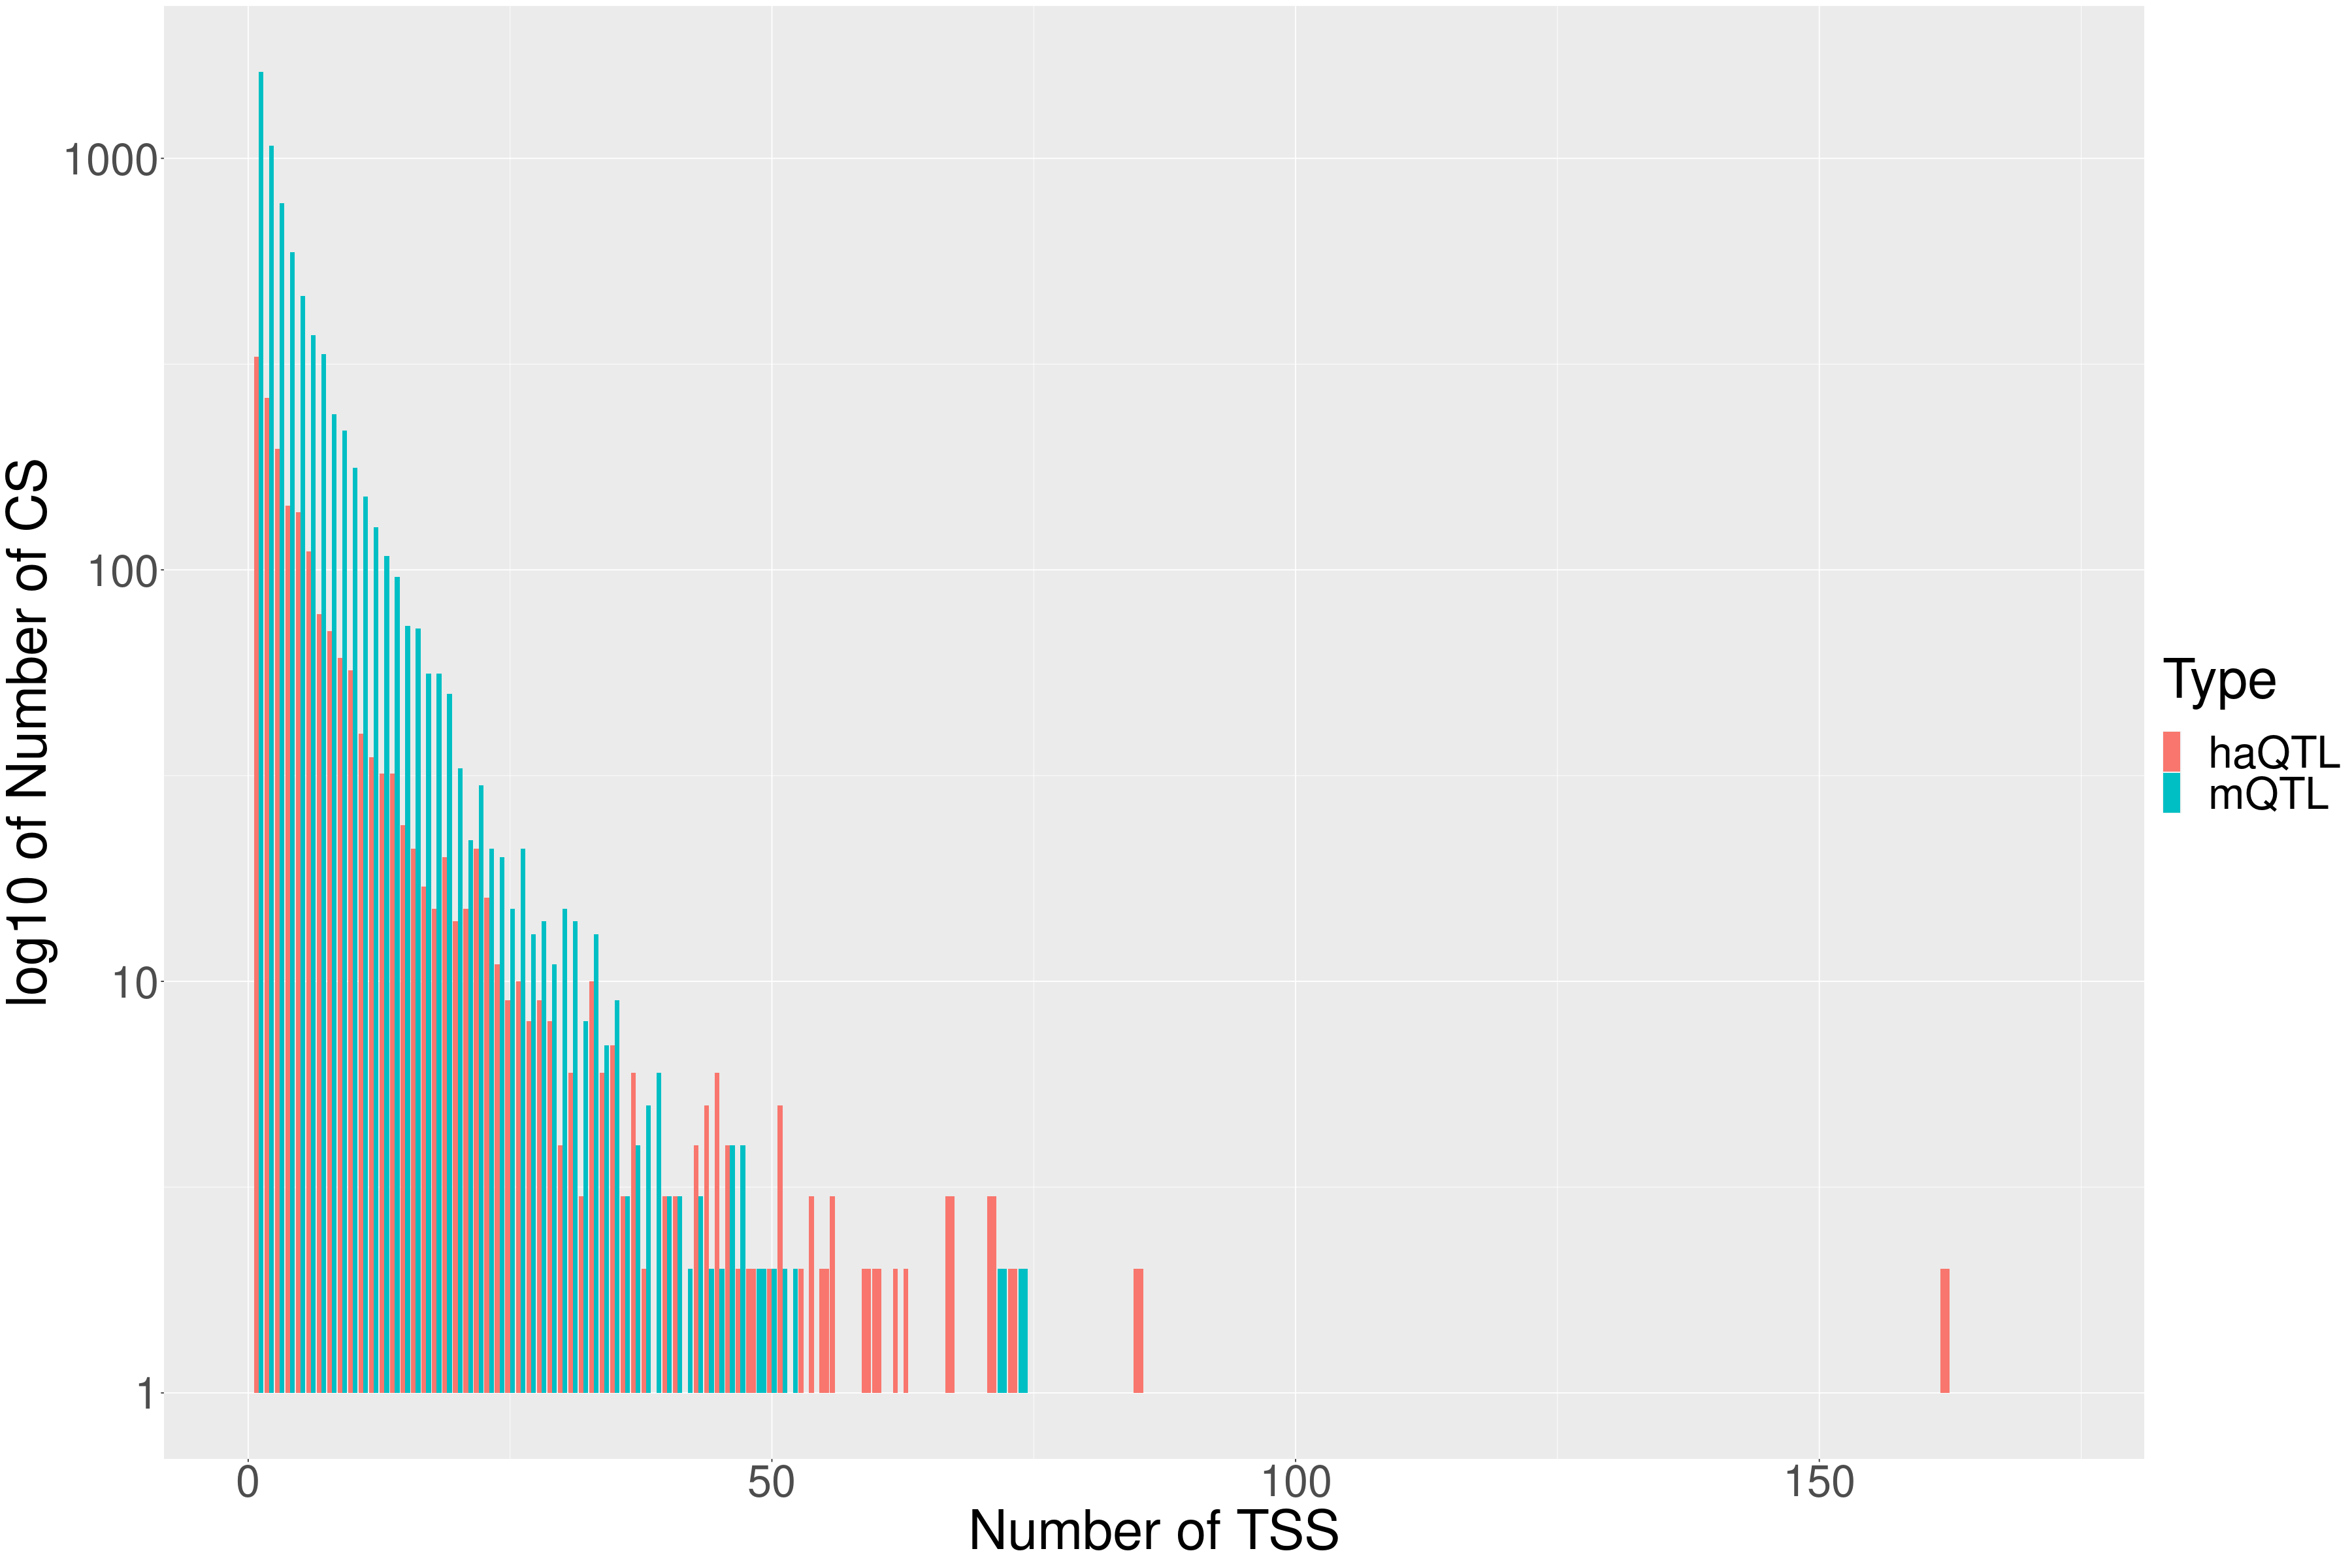

In [16]:
plot_df%>%count(type,molecular_trait_id ,CS)%>%ggplot()+geom_bar(aes(x =n,fill = type ), position = "dodge")+xlab("Number of TSS")+scale_y_log10()+ylab("log10 of Number of CS")+theme(text = element_text(size = 50))+labs(fill = "Type")

## Fig: Distribution of distance between most distal, closet, and median TSS

In [17]:
plot_df_dist =  plot_df%>%group_by(type,molecular_trait_id,CS)%>%mutate(dist = start-position)%>%summarise(max_dist = dist[abs(dist) == max(abs(dist))], min_dist =  dist[abs(dist) == min(abs(dist))], median_dist =  median(dist)  )

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'type', 'molecular_trait_id', 'CS'. You can
override using the `.groups` argument.


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


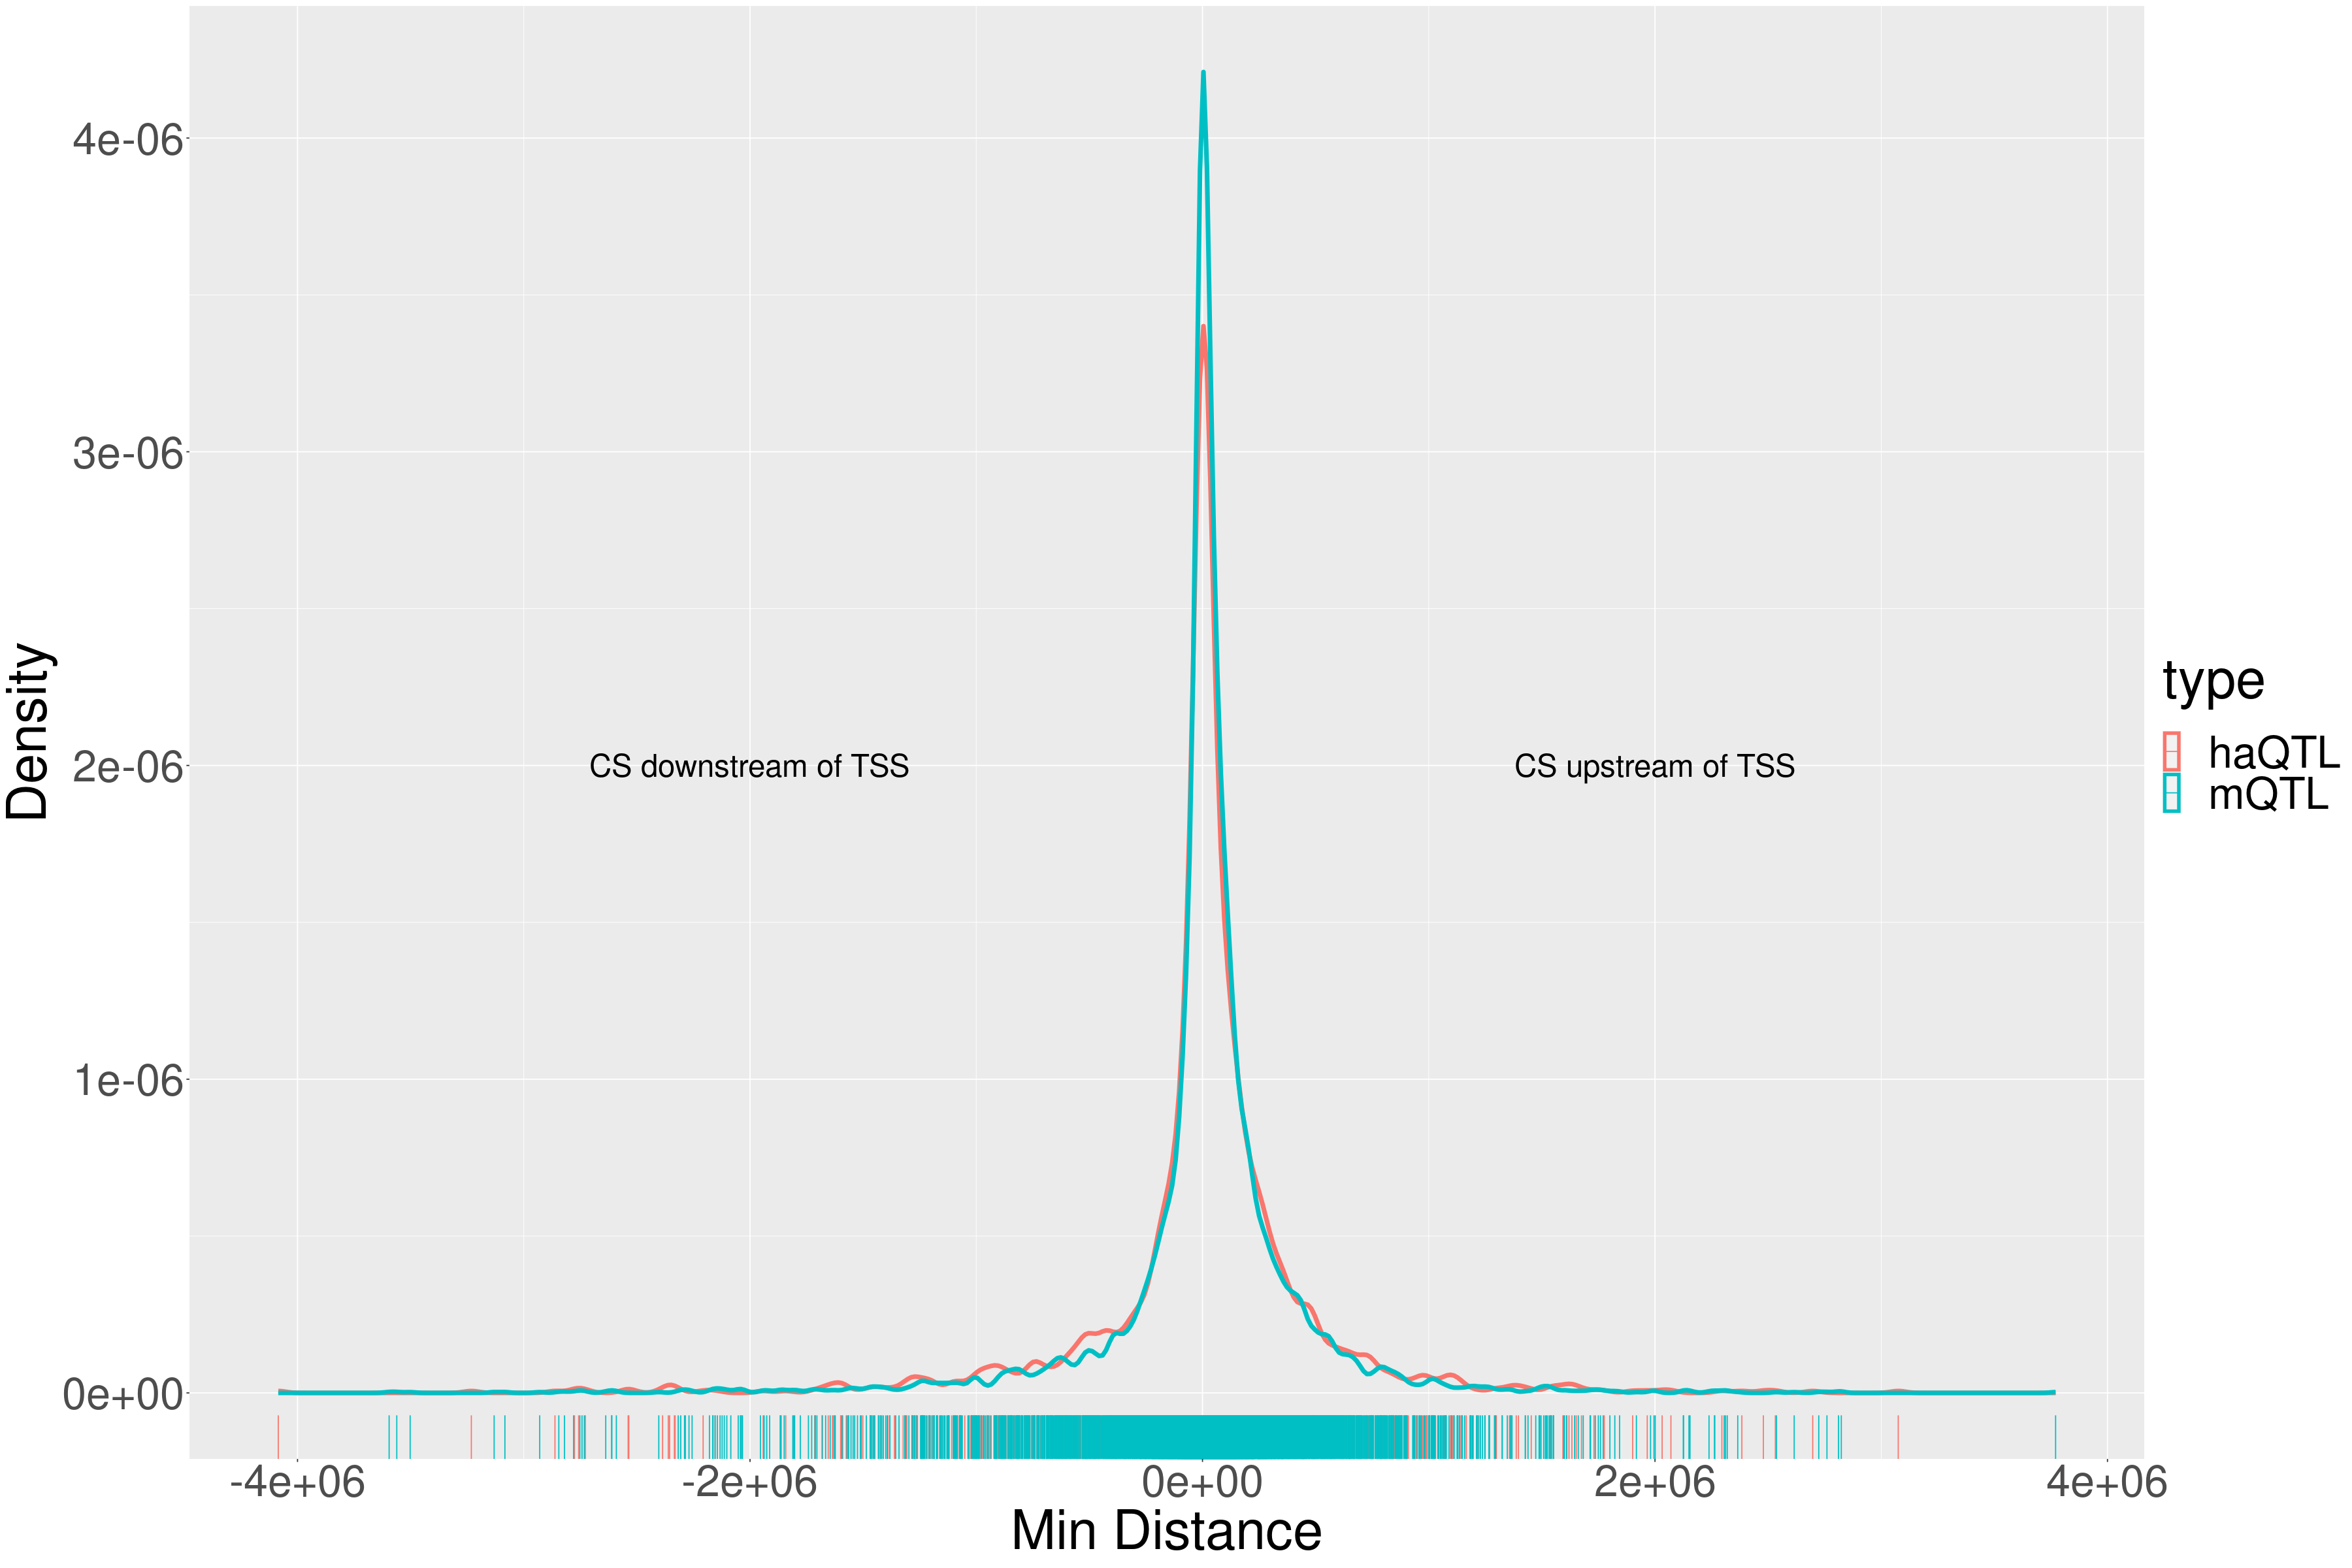

In [18]:
plot_df_dist%>%ggplot(aes(x = min_dist, color = type))+geom_density( size = 2)+theme(text = element_text(size = 50))+ylab("Density")+xlab("Min Distance")+geom_rug()+ annotate("text", x = c(2e+6,-2e+6 ), y = c(2e-6), label =  c("CS upstream of TSS","CS downstream of TSS"  ) , size = 10)

In [21]:
plot_df_dist%>%write_delim("5_dist_max.tsv","\t")

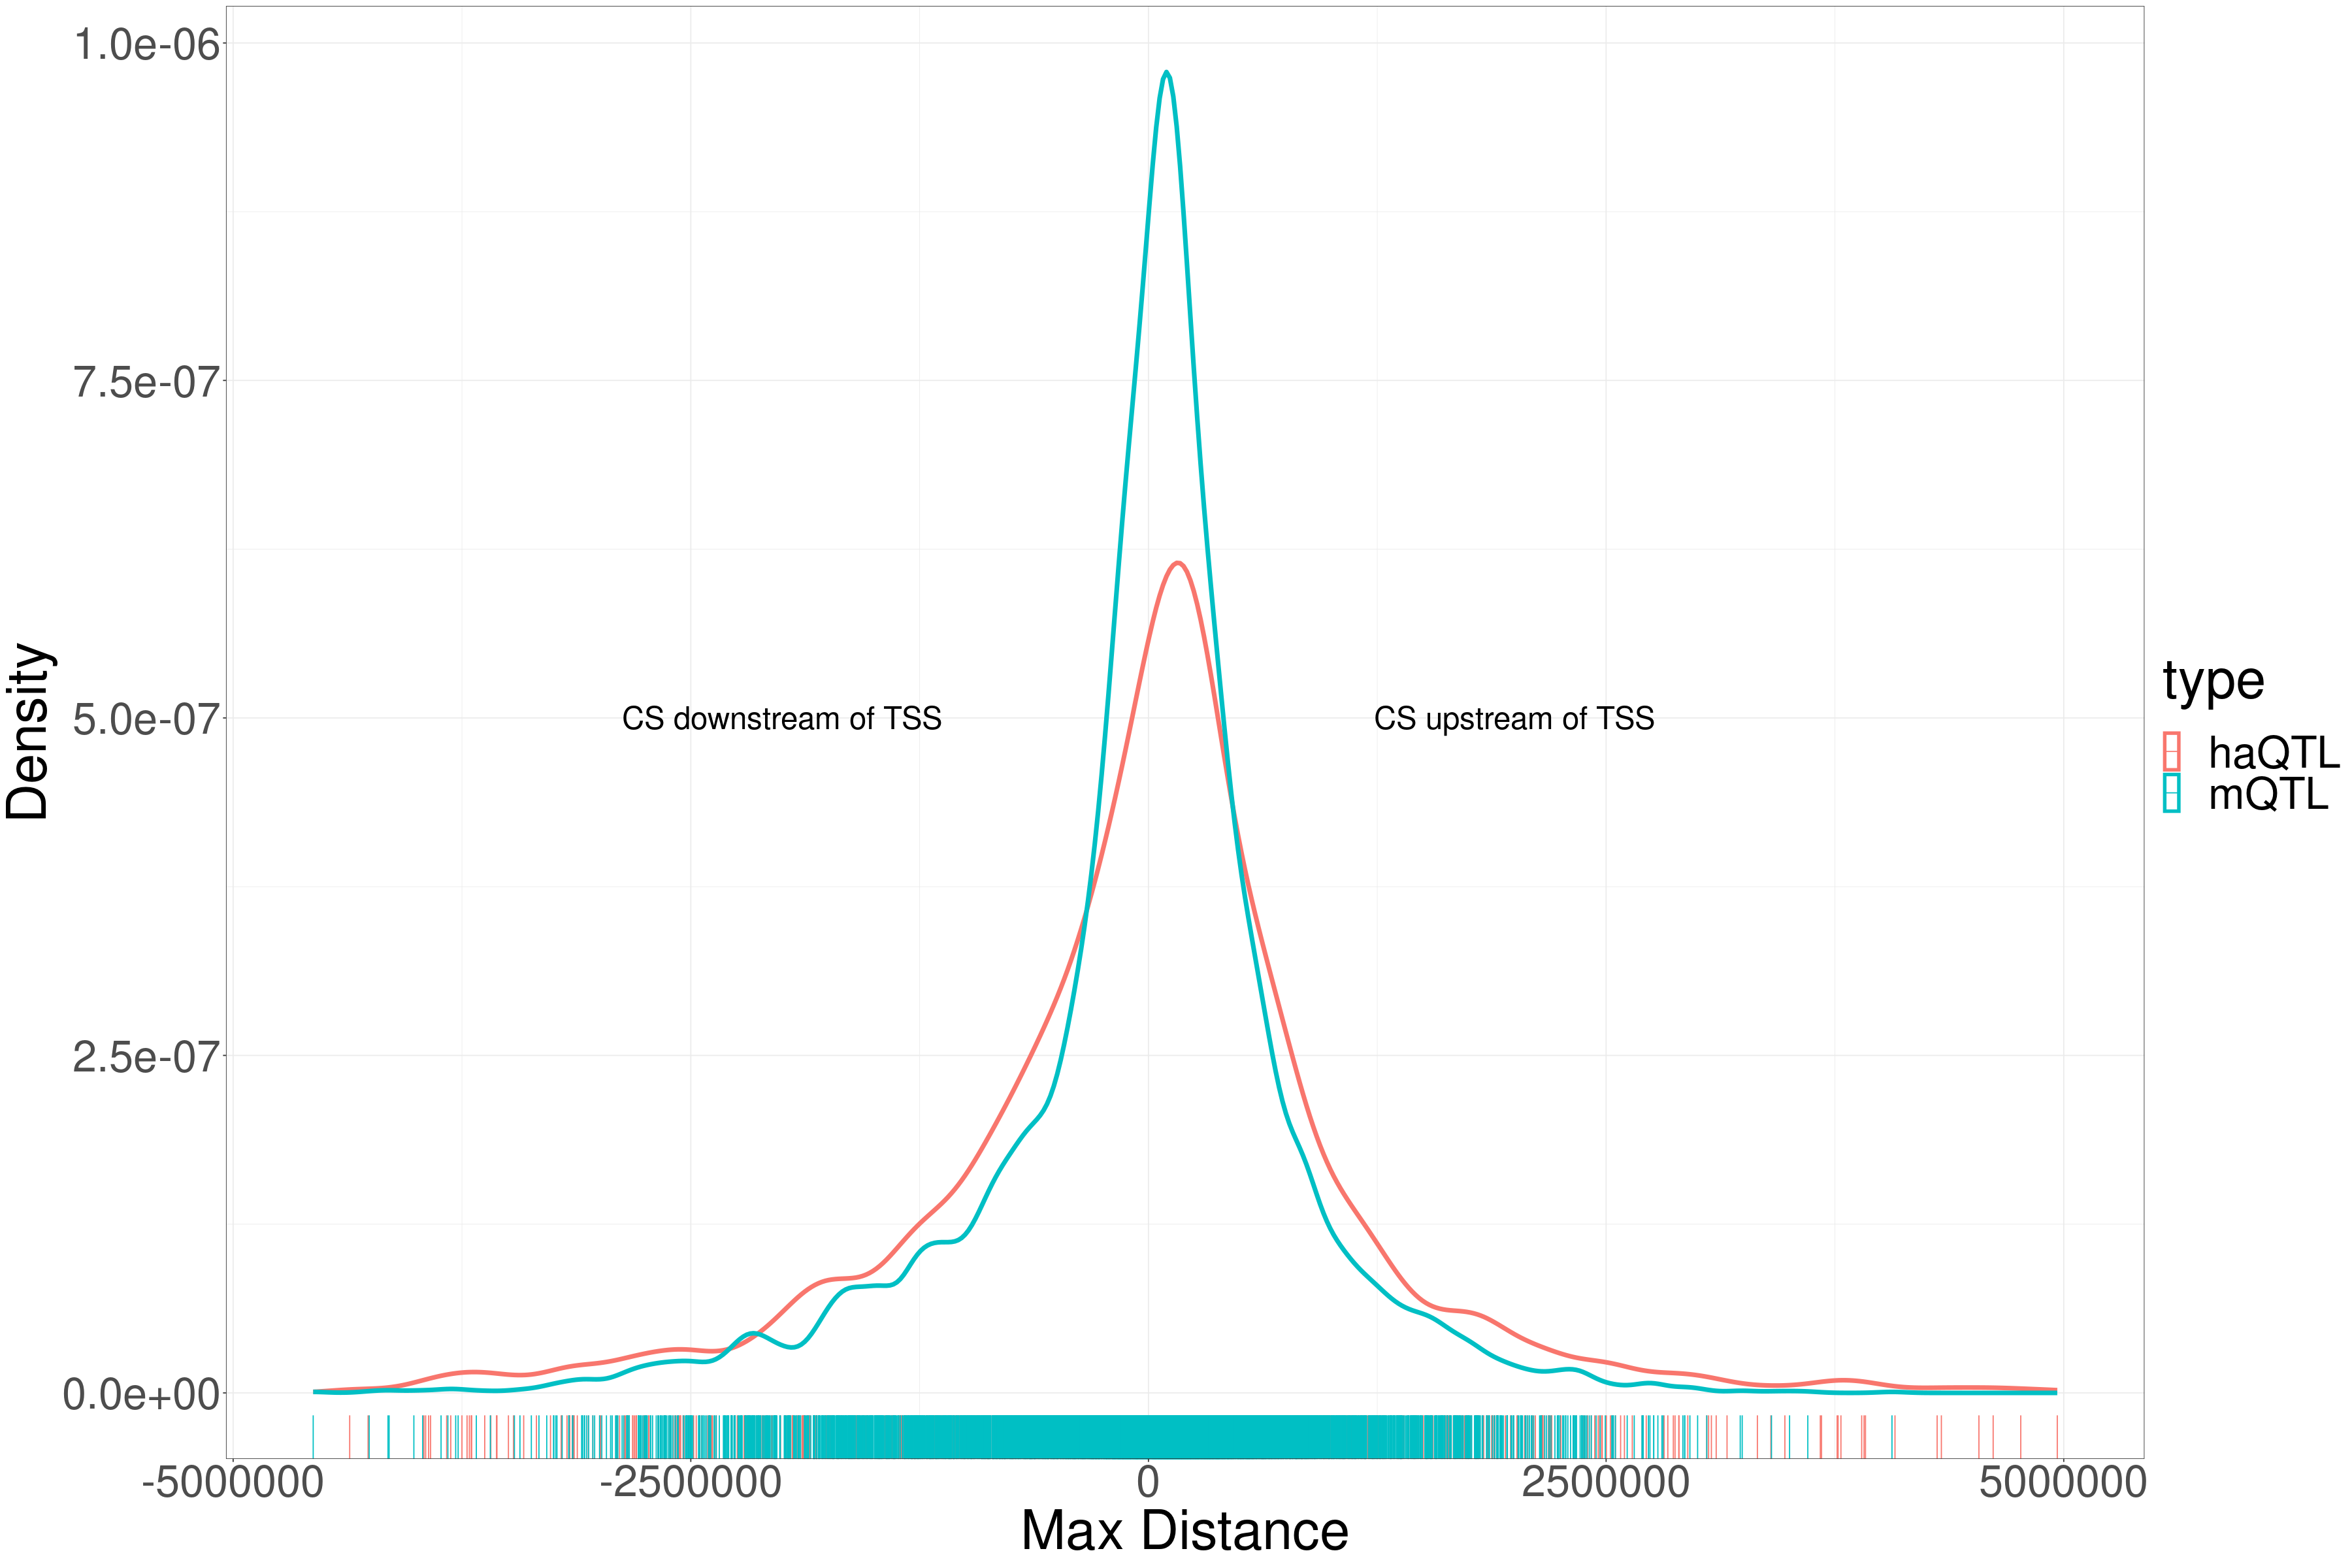

In [22]:
plot_df_dist%>%ggplot(aes(x = max_dist, color = type))+geom_rug()+geom_density( size = 2)+theme_bw()+theme(text = element_text(size = 50))+ylab("Density")+xlab("Max Distance")+ annotate("text", x = c(2e+6,-2e+6 ), y = c(5e-7), label =  c("CS upstream of TSS","CS downstream of TSS"  ) , size = 10)

In [23]:
mean(plot_df_dist%>%filter(type == "haQTL")%>%pull(max_dist)%>%abs  > 500000 )

[1] 0.51102

In [24]:
mean(plot_df_dist%>%filter(type == "mQTL")%>%pull(max_dist)%>%abs  > 500000 )

[1] 0.3806204

In [25]:
mean(plot_df_dist%>%filter(type == "haQTL")%>%pull(max_dist)  < 0)

[1] 0.4597642

In [26]:
mean(plot_df_dist%>%filter(type == "mQTL")%>%pull(max_dist)  <0)

[1] 0.4416619

In [27]:
mean(plot_df_dist$max_dist  < 0)

[1] 0.4455953

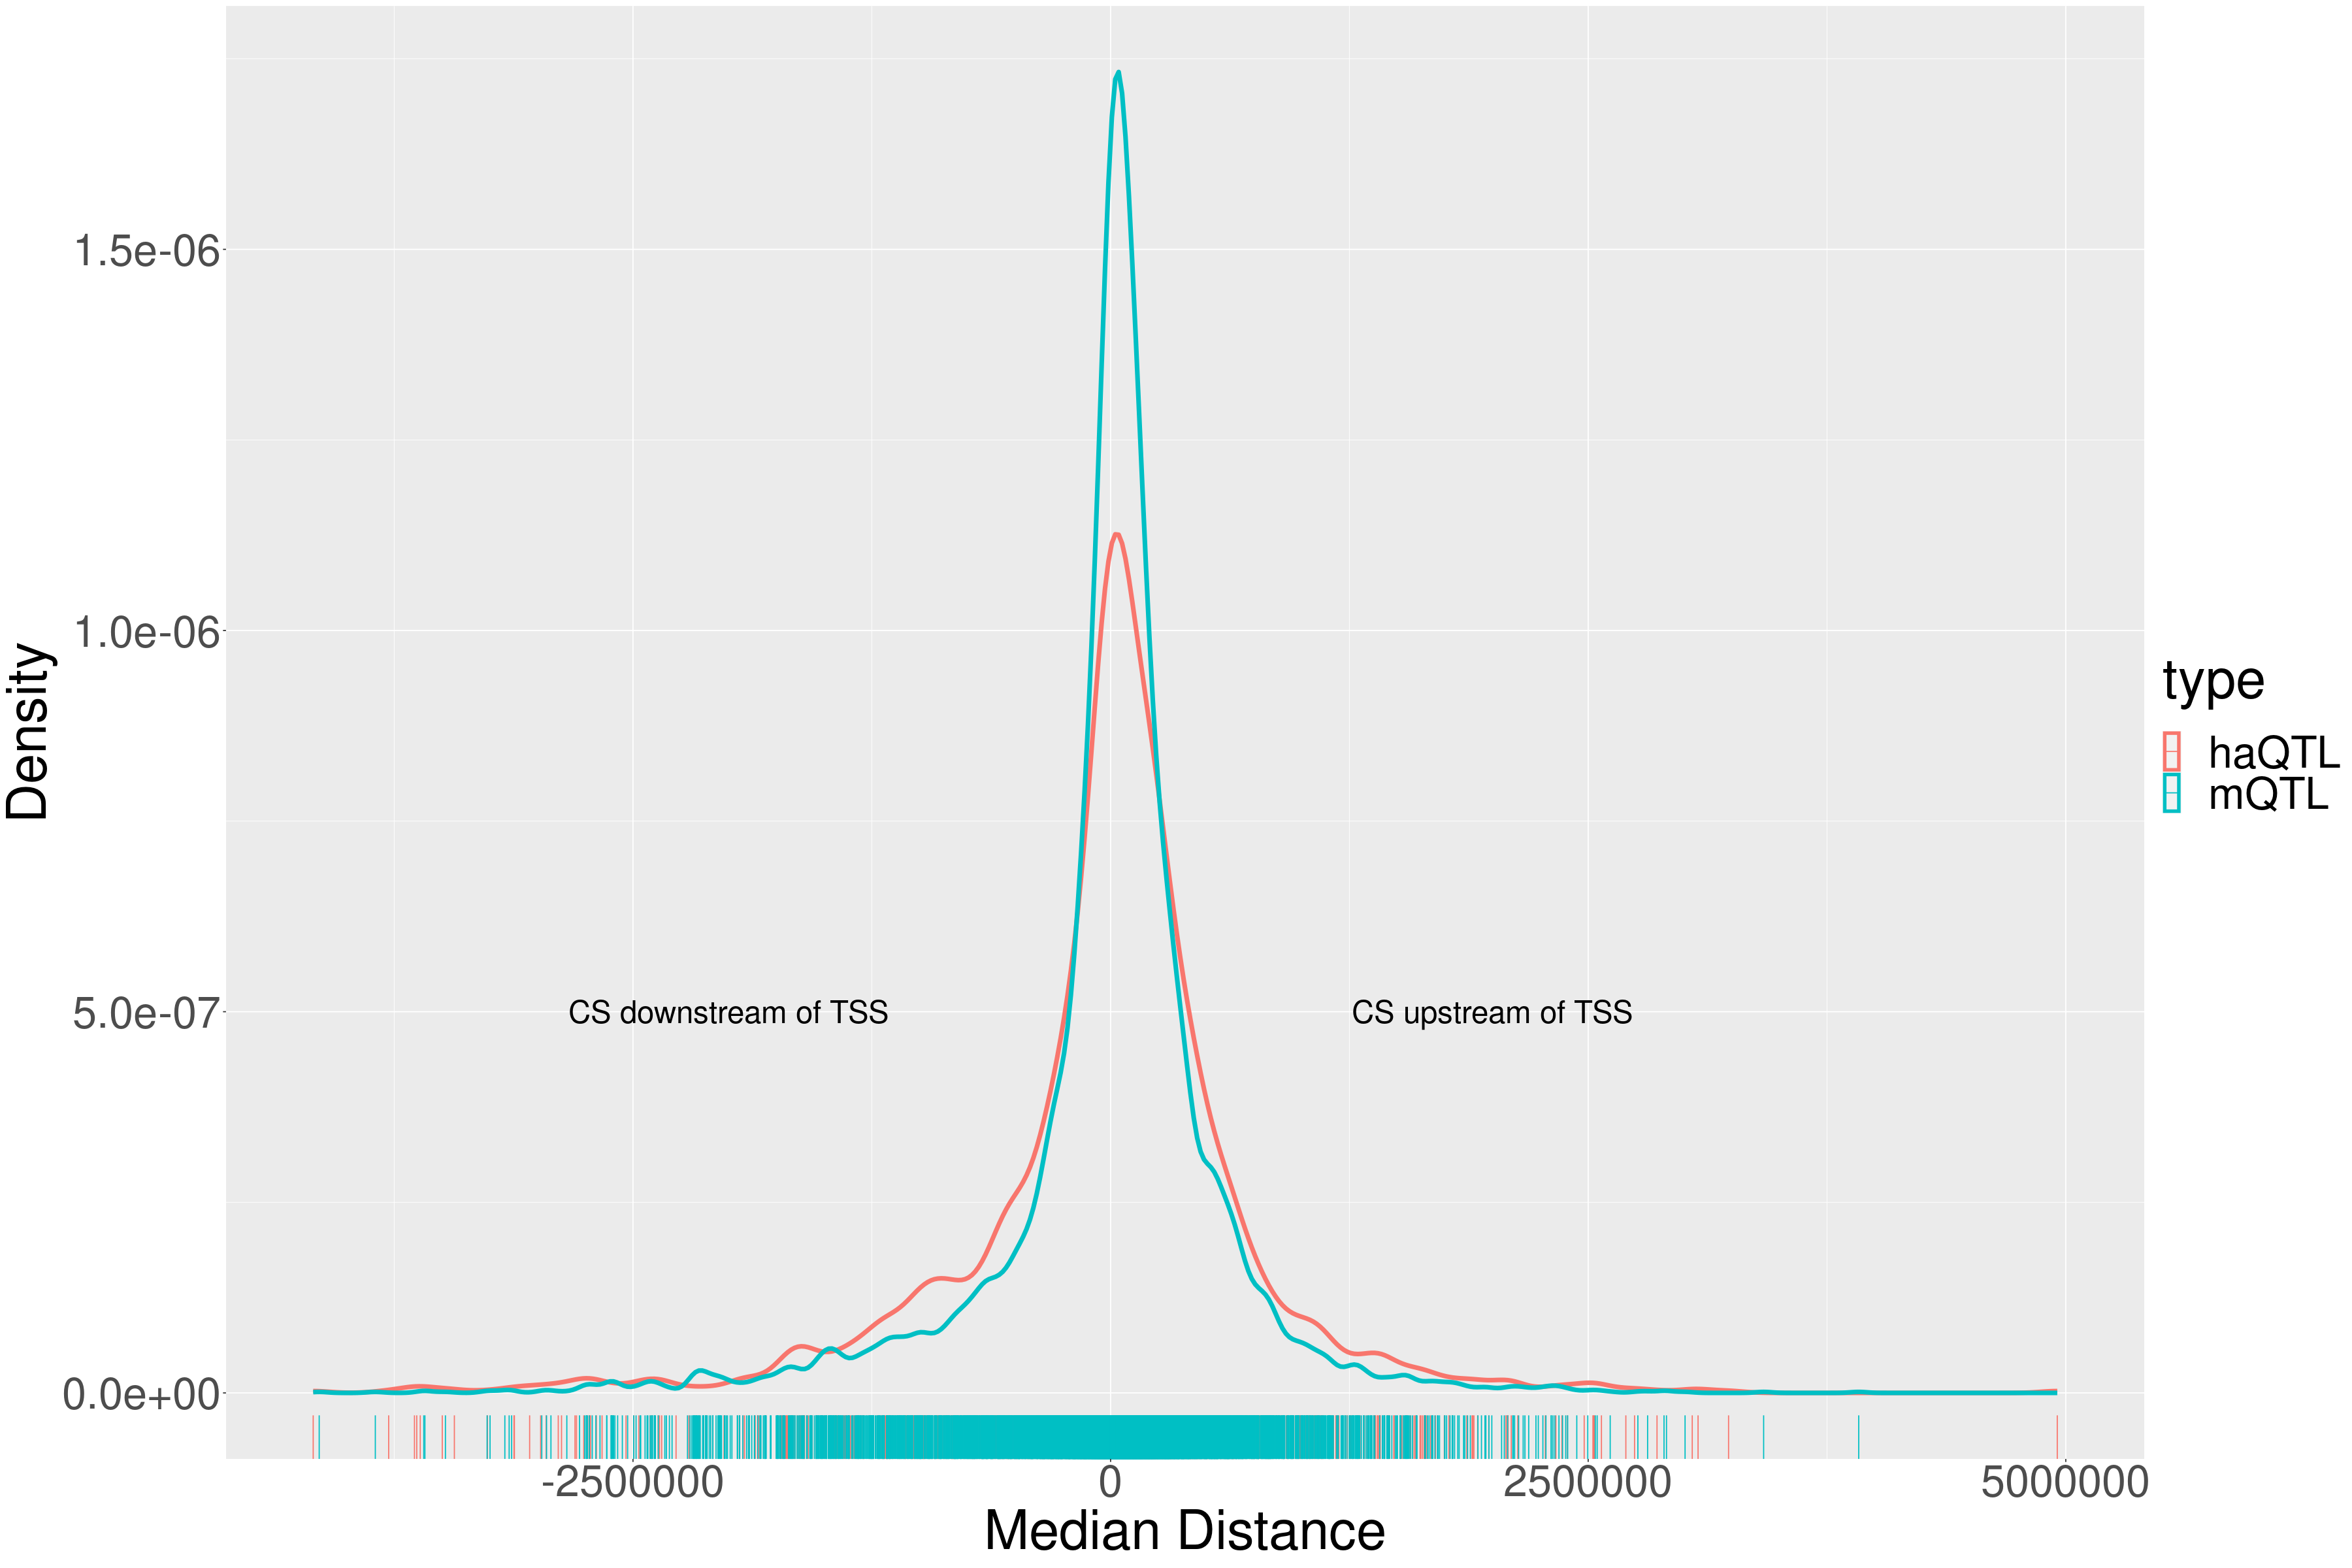

In [28]:
plot_df_dist%>%ggplot(aes(x = median_dist, color = type))+geom_rug()+geom_density( size = 2)+theme(text = element_text(size = 50))+ylab("Density")+xlab("Median Distance")+ annotate("text", x = c(2e+6,-2e+6 ), y = c(5e-7), label =  c("CS upstream of TSS","CS downstream of TSS"  ) , size = 10)

In [25]:
haQTL_affected_region_gene = inner_join(haQTL_affected_region, gene_name, c("chr" = "#chr"))%>%filter(start < End, start > Start)

Warning message in inner_join(haQTL_affected_region, gene_name, c(chr = "#chr")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [26]:
mQTL_affected_region_gene = inner_join(mQTL_affected_region, gene_name, c("chr" = "#chr"))%>%filter(start < End, start > Start)

Warning message in inner_join(mQTL_affected_region, gene_name, c(chr = "#chr")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
